In [21]:
import numpy as np
import pandas as pd
import astropy.units as u
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [24]:
LAMBDA_LASER = 6328.16 # Angstrom

fente_500 = pd.read_csv("data/raman/fente_500.txt",
				names = ["lam", "cps"], sep="\t", skiprows=1)
fente_200 = pd.read_csv("data/raman/fente_200.txt",
				names = ["lam", "cps"], sep="\t", skiprows=1)
fente_50 = pd.read_csv("data/raman/fente_50.txt",
				names = ["lam", "cps"], sep="\t", skiprows=1)

def convert(lam_spectre):
	return (LAMBDA_LASER**(-1) - lam_spectre**(-1)) * 10**8 # cm-1

def gaussian(x, mu, sigma, A):
	return A * np.exp(-(x-mu)**2/ sigma**2 / 2)

fente_50["lam"] = fente_50["lam"] * u.Angstrom
fente_50["lam"] = fente_50["lam"].apply(convert)


<Figure size 432x288 with 0 Axes>

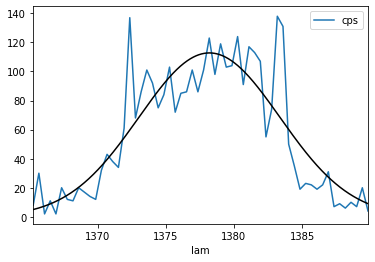

In [32]:
%matplotlib inline
lam = np.arange(1365, 1390, 0.01)
y_estimated = gaussian(lam, 1378.20663691,    5.17785266,  112.77060793)
plt.figure()
fente_50[(fente_50["lam"] > 1365) & (fente_50["lam"] < 1390)].plot(x="lam", y="cps")
plt.plot(lam, y_estimated, "k-")

In [31]:
 curve_fit(gaussian, 
		xdata=fente_50["lam"][(fente_50["lam"] > 1365) & (fente_50["lam"] < 1390)],
		ydata=fente_50["cps"][(fente_50["lam"] > 1365) & (fente_50["lam"] < 1390)],
          p0=[1377, 5, 120])

(array([1378.20663691,    5.17785266,  112.77060793]),
 array([[ 8.90765899e-02,  9.77740904e-04, -9.18641671e-03],
        [ 9.77740904e-04,  9.34553354e-02, -1.00824616e+00],
        [-9.18641671e-03, -1.00824616e+00,  3.18041336e+01]]))